In [6]:
%reload_ext autoreload
%autoreload 2
import sys
sys.path.insert(1, '/p/project/chhb19/gaertner2/lkf_detection/functions/')
from statistics_functions import *
sys.path.insert(1, '/p/project/chhb19/gaertner2/lkf_tools/lkf_tools/')
from dataset import *
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size':20})
import cartopy
import cartopy.crs as ccrs

In [7]:
path = '/p/project/chhb19/gaertner2/data/awicm_cvmix/'
path_ds = path + 'datasets/'
path_imgs = path + 'imgs/'

scratch = '/p/scratch/chhb19/gaertner2/'

In [8]:
LKF_map_monthly = np.load(scratch + 'LKF_map_monthly.npy')

In [9]:
i = 5
LKF_map_monthly_av = np.mean(LKF_map_monthly[:i], axis=0)
LKF_map_monthly_90_av = np.mean(LKF_map_monthly[i:], axis=0)

In [10]:
lkf_data = np.load(path_ds + f'ds_2013.npy', allow_pickle=True)[0]

z = 70
# arctic basin
a = max([0,lkf_data.index_y[0][0]-1])
b = lkf_data.index_y[0][-1]+2
c = max([0,lkf_data.index_x[0][0]-1])
d = lkf_data.index_x[0][-1]+2 - z
e = lkf_data.red_fac

lon = lkf_data.lon[a:b:e,c:d:e]
lat = lkf_data.lat[a:b:e,c:d:e]

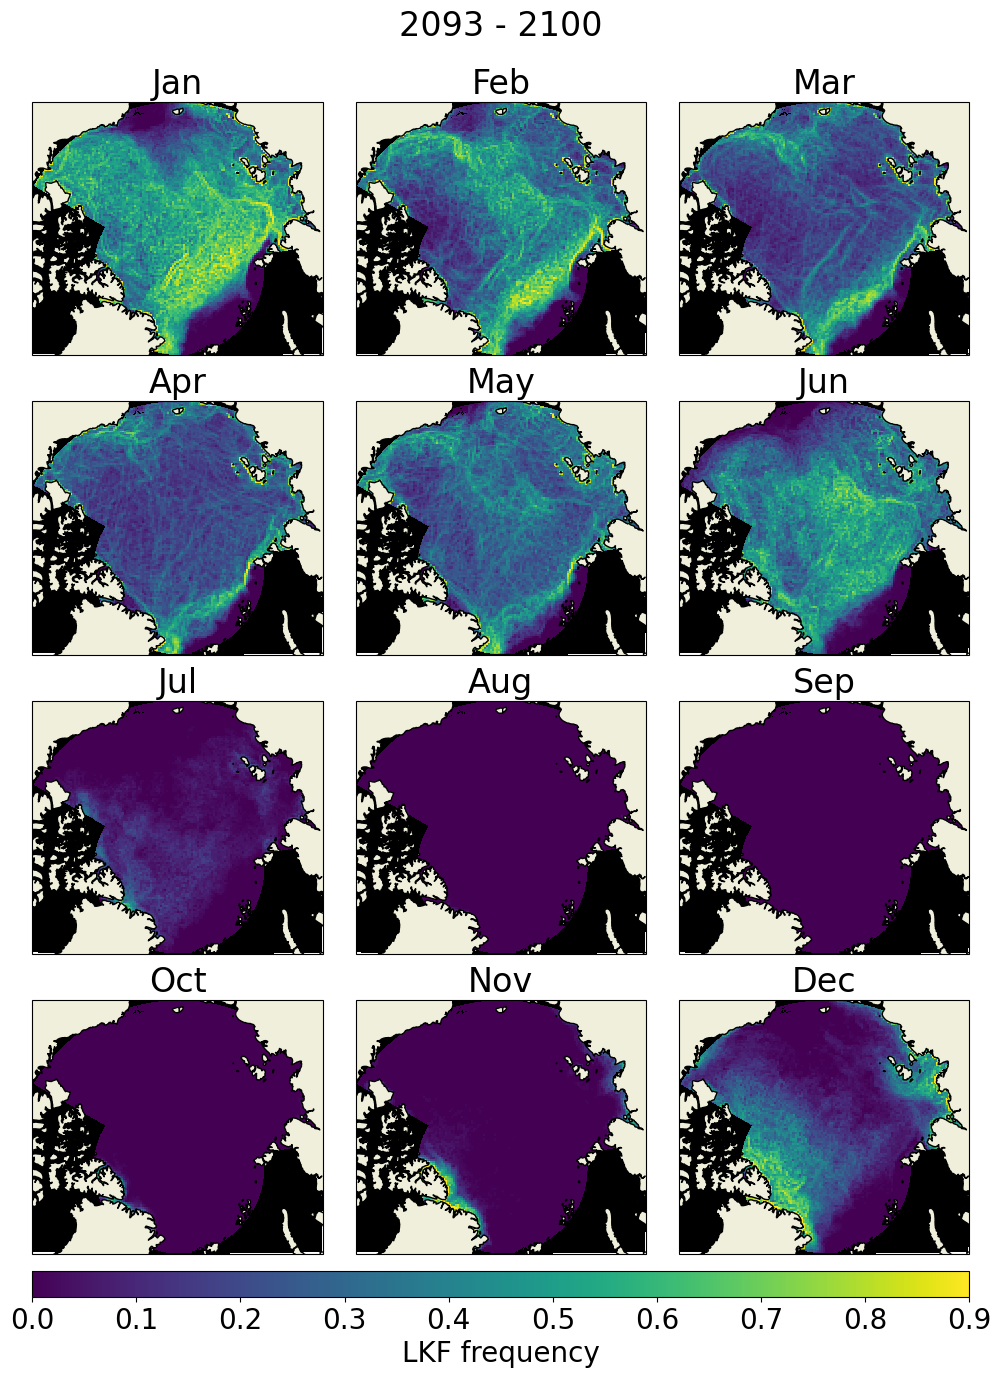

In [129]:
fig = plt.figure(figsize=[10, 13])
axs = [fig.add_subplot(4,3,i, projection=ccrs.Orthographic(0, 90)) for i in range(1,13)]

for ind_month, ax, title in zip(np.arange(12), axs, xticks_labels):

    ax.pcolormesh(lon, lat, np.zeros_like(lon), transform = ccrs.PlateCarree(), cmap='Greys_r', vmin=0, vmax=1)
    ax.add_feature(cartopy.feature.LAND, zorder=2, edgecolor='black')
    im = ax.pcolormesh(lon, lat, LKF_map_monthly_90_av[ind_month][:,:-z],
                  transform=ccrs.PlateCarree(), vmin=0, vmax=0.9, cmap='viridis')

    ax.set_title(title)

fig.suptitle('2093 - 2100')
fig.tight_layout()

p0 = axs[-3].get_position().get_points().flatten()
p1 = axs[-1].get_position().get_points().flatten()
ax_cbar = fig.add_axes([p0[0], -0.01, p1[2]-p0[0], 0.02])
cbar = plt.colorbar(im, label='LKF frequency', cax=ax_cbar, orientation='horizontal')

plt.savefig(scratch+'imgs/LKFs_f_90s_d005.png', dpi=100, bbox_inches='tight')

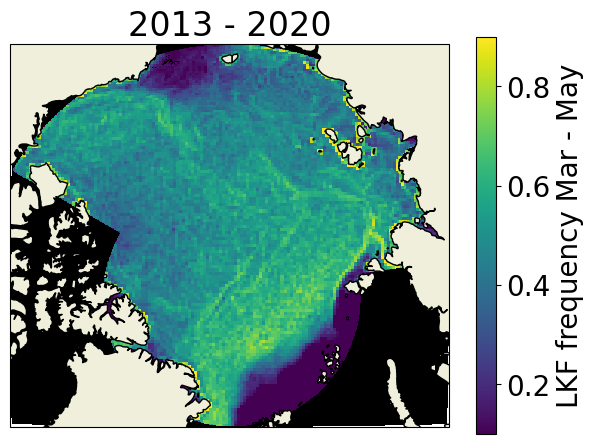

In [105]:
fig = plt.figure()
ax = fig.add_subplot(projection=cartopy.crs.Orthographic(0, 90))

ax.pcolormesh(lon, lat, np.zeros_like(lon), transform = ccrs.PlateCarree(), cmap='Greys_r', vmin=0, vmax=1)
ax.add_feature(cartopy.feature.LAND, zorder=2, edgecolor='black')
im = ax.pcolormesh(lon, lat, np.mean(LKF_map_monthly_90_av[0:3], axis=0)[:,:-z],
              transform=ccrs.PlateCarree(), vmin=0.1, vmax=0.9, cmap='viridis')

ax.set_title('2013 - 2020')
plt.colorbar(im, label='LKF frequency Mar - May')
fig.tight_layout()
plt.savefig(scratch + 'imgs/jan_mar_10s_d001.png', dpi=100, bbox_inches='tight')

In [11]:
LKF_map_monthly = np.load(scratch + 'LKF_map_monthly.npy')

In [12]:
years = [2013, 2015, 2017, 2019, 2020,
         2093, 2094, 2095, 2096, 2097, 2100]

In [13]:
for ind_year, LKF_map_monthly_year in enumerate(LKF_map_monthly):
    fig = plt.figure(figsize=[10, 13])
    axs = [fig.add_subplot(4,3,i, projection=ccrs.Orthographic(0, 90)) for i in range(1,13)]

    for ind_month, ax, title in zip(np.arange(12), axs, xticks_labels):

        ax.pcolormesh(lon, lat, np.zeros_like(lon), transform = ccrs.PlateCarree(), cmap='Greys_r', vmin=0, vmax=1)
        ax.add_feature(cartopy.feature.LAND, zorder=2, edgecolor='black')
        im = ax.pcolormesh(lon, lat, LKF_map_monthly[ind_year][ind_month][:,:-z],
                      transform=ccrs.PlateCarree(), vmin=0, vmax=1)

        ax.set_title(title)

    fig.tight_layout()

    p0 = axs[-3].get_position().get_points().flatten()
    p1 = axs[-1].get_position().get_points().flatten()
    ax_cbar = fig.add_axes([p0[0], -0.01, p1[2]-p0[0], 0.02])
    cbar = plt.colorbar(im,label='LKF frequency', cax=ax_cbar, orientation='horizontal')
    
    plt.savefig(scratch + f'imgs/LKFs_f_yearly_d001/LKFs_f_{years[ind_year]}.png', dpi=100, bbox_inches='tight')
    plt.close()